In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


# Load data


In [117]:
df=pd.read_csv('Loan Status.csv')

In [118]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [119]:
df.shape

(614, 13)

In [120]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [122]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handle Missing Values


In [123]:
df=df.dropna()

In [124]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Feature Encoding


In [125]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-125-fd5d5f81fe19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [126]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [127]:
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [128]:
df.replace(to_replace='3+',value=4,inplace=True)

<ipython-input-128-58532b24d642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace='3+',value=4,inplace=True)


In [129]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

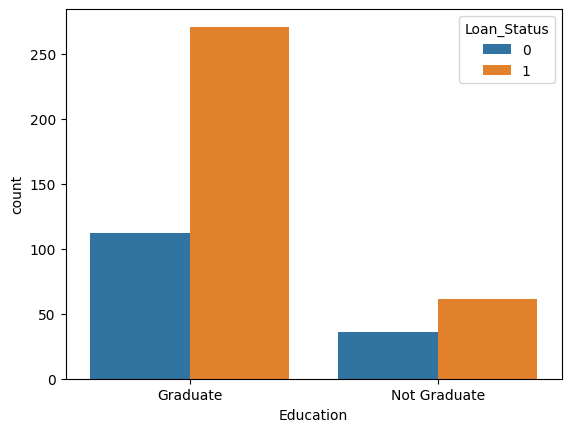

In [130]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

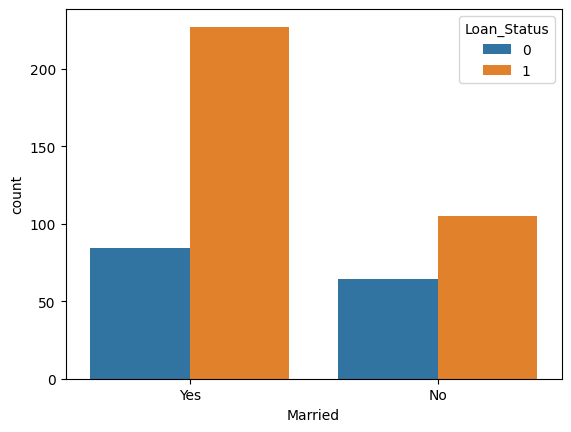

In [131]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [132]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-132-3bd62ffdcef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [133]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Create Features and Target


In [134]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']


# Split data


In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)


# Feature Scaling


In [136]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Training and Evaluation

In [137]:
model=svm.SVC(kernel='linear')

In [138]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [139]:
## Checking the accuracy

In [140]:
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [141]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8055555555555556


In [142]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)

In [143]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


In [144]:
# 1. Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}
model_lr = LogisticRegression()
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
best_model_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [145]:
# 2. Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
model_svm = SVC()
grid_search_svm = GridSearchCV(model_svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_model_svm = grid_search_svm.best_estimator_
best_params_svm = grid_search_svm.best_params_


In [146]:
# 3. Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
model_rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_


In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
lr_y_pred = model_lr.predict(X_test)

lr_y_pred = model_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)
lr_roc_auc = roc_auc_score(y_test, lr_y_pred)


# Support Vector Machine

model_svm = SVC()
model_svm.fit(X_train, y_train)
svm_y_pred = model_svm.predict(X_test)

svm_y_pred = model_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_roc_auc = roc_auc_score(y_test, svm_y_pred)

# Random Forest

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_y_pred = model_rf.predict(X_test)

rf_y_pred = model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)

# Displaying the results
print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1-score: {lr_f1}, ROC-AUC: {lr_roc_auc}")

print("\nSupport Vector Machine:")
print(f"Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1-score: {svm_f1}, ROC-AUC: {svm_roc_auc}")

print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1-score: {rf_f1}, ROC-AUC: {rf_roc_auc}")


Logistic Regression:
Accuracy: 0.8333333333333334, Precision: 0.8378378378378378, Recall: 0.9393939393939394, F1-score: 0.8857142857142858, ROC-AUC: 0.7696969696969697

Support Vector Machine:
Accuracy: 0.8333333333333334, Precision: 0.8378378378378378, Recall: 0.9393939393939394, F1-score: 0.8857142857142858, ROC-AUC: 0.7696969696969697

Random Forest:
Accuracy: 0.8125, Precision: 0.8333333333333334, Recall: 0.9090909090909091, F1-score: 0.8695652173913043, ROC-AUC: 0.7545454545454546


# Additional Visualizations

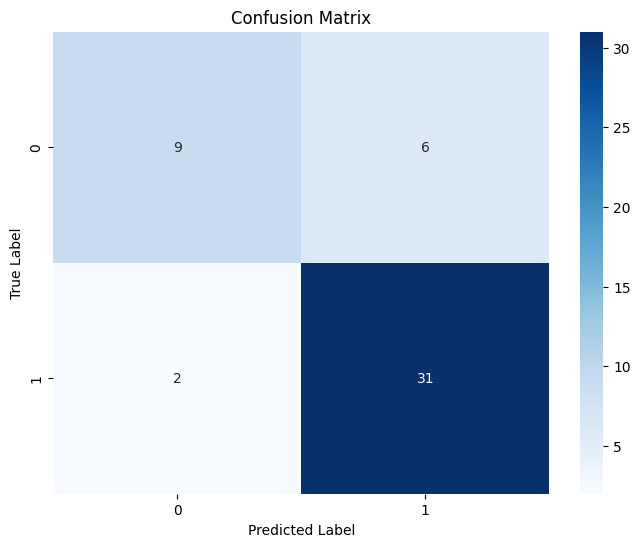

In [148]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [149]:
# 2. Classification Report
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48



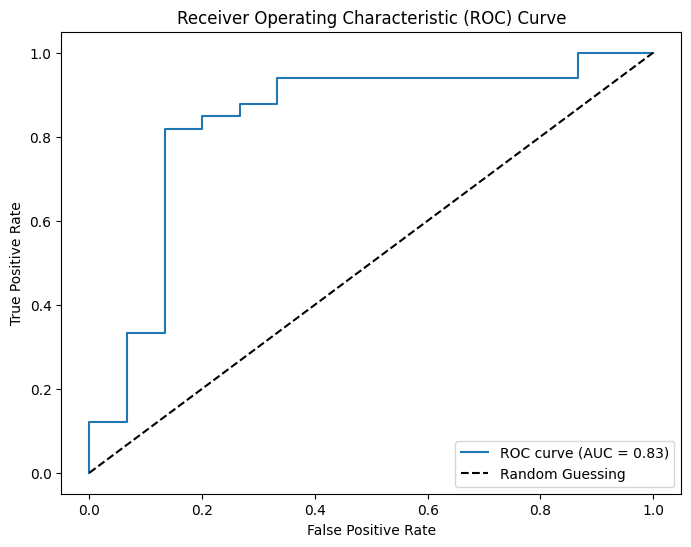

In [150]:
# 3. ROC Curve (For binary classification)
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))  # Use decision_function for SVM
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()